# Proyecto: Predicción de Alertas Térmicas mediante Aprendizaje Automático

Alumno: Mariano Buet

Se propone desarrollar un modelo de clasificación multiclase que prediga tres tipos de estados térmicos —riesgo de helada, clima de confort y riesgo de sobrecalor— a partir de variables meteorológicas.
El objetivo principal es anticipar condiciones extremas para apoyar la toma de decisiones preventivas en distintos ámbitos: agrícola (proteger cultivos), doméstico (evitar congelamiento de cañerías) e industrial (ajustar sistemas de ventilación o riego)

In [ ]:
# Librerías principales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Leer el archivo Excel directamente desde GitHub
url = "https://github.com/MarianoBuet/Aprendizaje-Autom-tico/raw/main/Entregas_Parcial/datos/Estad%C3%ADsticas%20normales%20Datos%20abiertos%201991-2020%20-%20AJUSTADO.xlsx"

df = pd.read_excel(url,header=0)
# Mostrar las primeras filas
df.head()

,Estacion,Mes,Frecuencia de dÃ­as con PrecipitaciÃ³n superior a 1.0 mm,Humedad (%),Nubosidad (octavos),PrecipitaciÃ³n (mm),Temp Media (Â°C),Temp MÃ¡x (Â°C),Temp MÃ­n (Â°C),Velocidad del Viento (km/h) (2011-2020)
0,AEROPARQUE AERO,Ene,6.7,67.0,3.1,117.5,24.5,28.4,20.8,16.8
1,AEROPARQUE AERO,Feb,6.0,69.8,3.2,112.3,23.7,27.3,20.2,15.8
2,AEROPARQUE AERO,Mar,5.9,71.3,3.1,111.8,22.0,25.5,18.8,14.9
3,AEROPARQUE AERO,Abr,6.6,73.6,3.5,108.3,18.5,22.0,15.3,13.9
4,AEROPARQUE AERO,May,5.0,76.4,4.0,83.3,15.2,18.4,12.3,12.9


In [ ]:
# Mostrar columnas y primeras filas
print("Columnas:")
print(df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

Columnas:
['Estacion', 'Mes', 'Frecuencia de dÃ\xadas con PrecipitaciÃ³n superior a 1.0 mm', 'Humedad (%)', 'Nubosidad (octavos)', 'PrecipitaciÃ³n (mm)', 'Temp Media (Â°C)', 'Temp MÃ¡x (Â°C)', 'Temp MÃ\xadn (Â°C)', 'Velocidad del Viento (km/h) (2011-2020)']

Primeras filas:
          Estacion  Mes  \
0  AEROPARQUE AERO  Ene   
1  AEROPARQUE AERO  Feb   
2  AEROPARQUE AERO  Mar   
3  AEROPARQUE AERO  Abr   
4  AEROPARQUE AERO  May   

   Frecuencia de dÃ­as con PrecipitaciÃ³n superior a 1.0 mm  Humedad (%)  \
0                                                6.7                67.0   
1                                                6.0                69.8   
2                                                5.9                71.3   
3                                                6.6                73.6   
4                                                5.0                76.4   

   Nubosidad (octavos)  PrecipitaciÃ³n (mm)  Temp Media (Â°C)  \
0                  3.1                11

# Analisis General del Set de Datos

Estructura General y tipos de variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Estacion                                                  1171 non-null   object 
 1   Mes                                                       1171 non-null   object 
 2   Frecuencia de dÃ­as con PrecipitaciÃ³n superior a 1.0 mm  1061 non-null   float64
 3   Humedad (%)                                               1110 non-null   float64
 4   Nubosidad (octavos)                                       1166 non-null   float64
 5   PrecipitaciÃ³n (mm)                                       1061 non-null   float64
 6   Temp Media (Â°C)                                          1167 non-null   float64
 7   Temp MÃ¡x (Â°C)                                           1158 non-null   float64
 8   Temp MÃ­n (Â°C)   

Analisis de los valores nulos

In [ ]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Estacion                                                      0
Mes                                                           0
Frecuencia de dÃ­as con PrecipitaciÃ³n superior a 1.0 mm    110
Humedad (%)                                                  61
Nubosidad (octavos)                                           5
PrecipitaciÃ³n (mm)                                         110
Temp Media (Â°C)                                              4
Temp MÃ¡x (Â°C)                                              13
Temp MÃ­n (Â°C)                                              47
Velocidad del Viento (km/h) (2011-2020)                     463
dtype: int64


Analisis de las variables numéricas

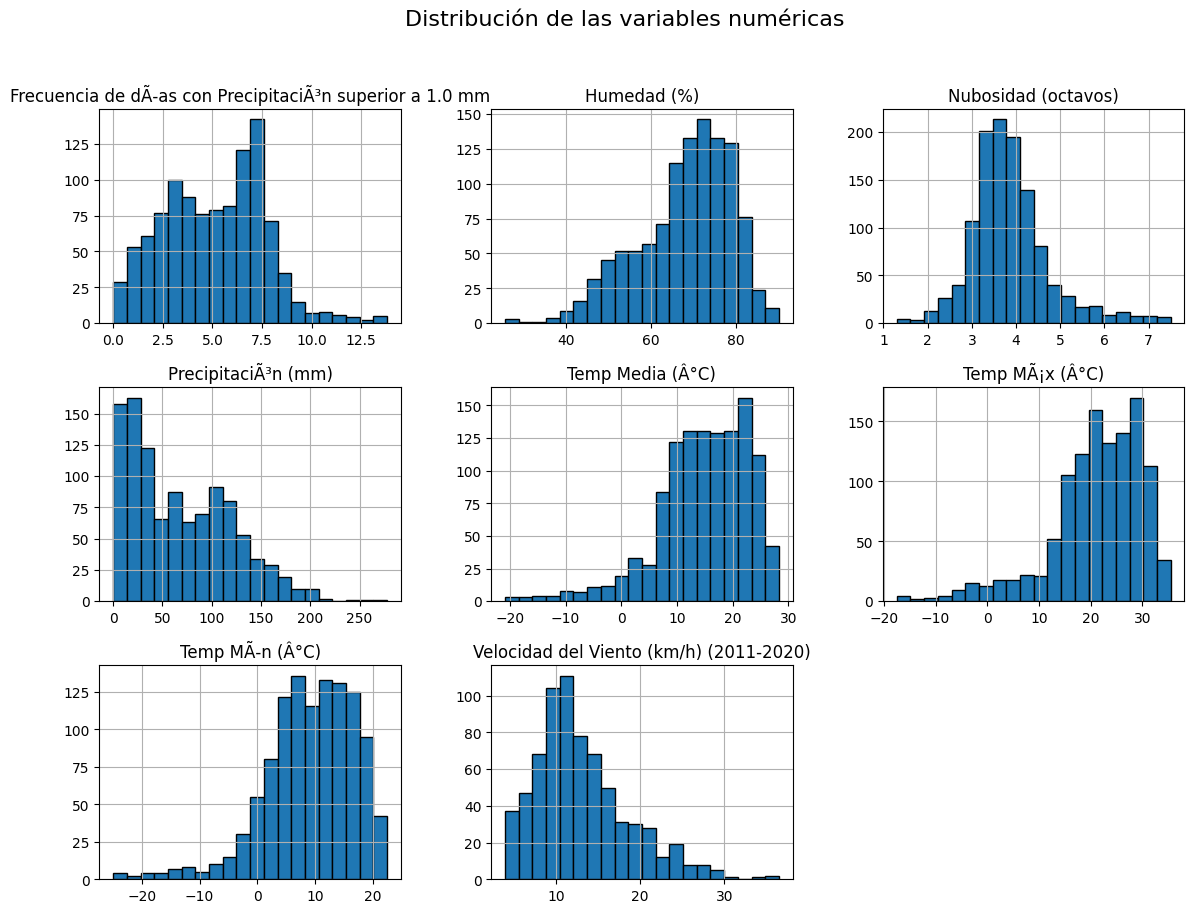

In [ ]:
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

df[variables_numericas].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

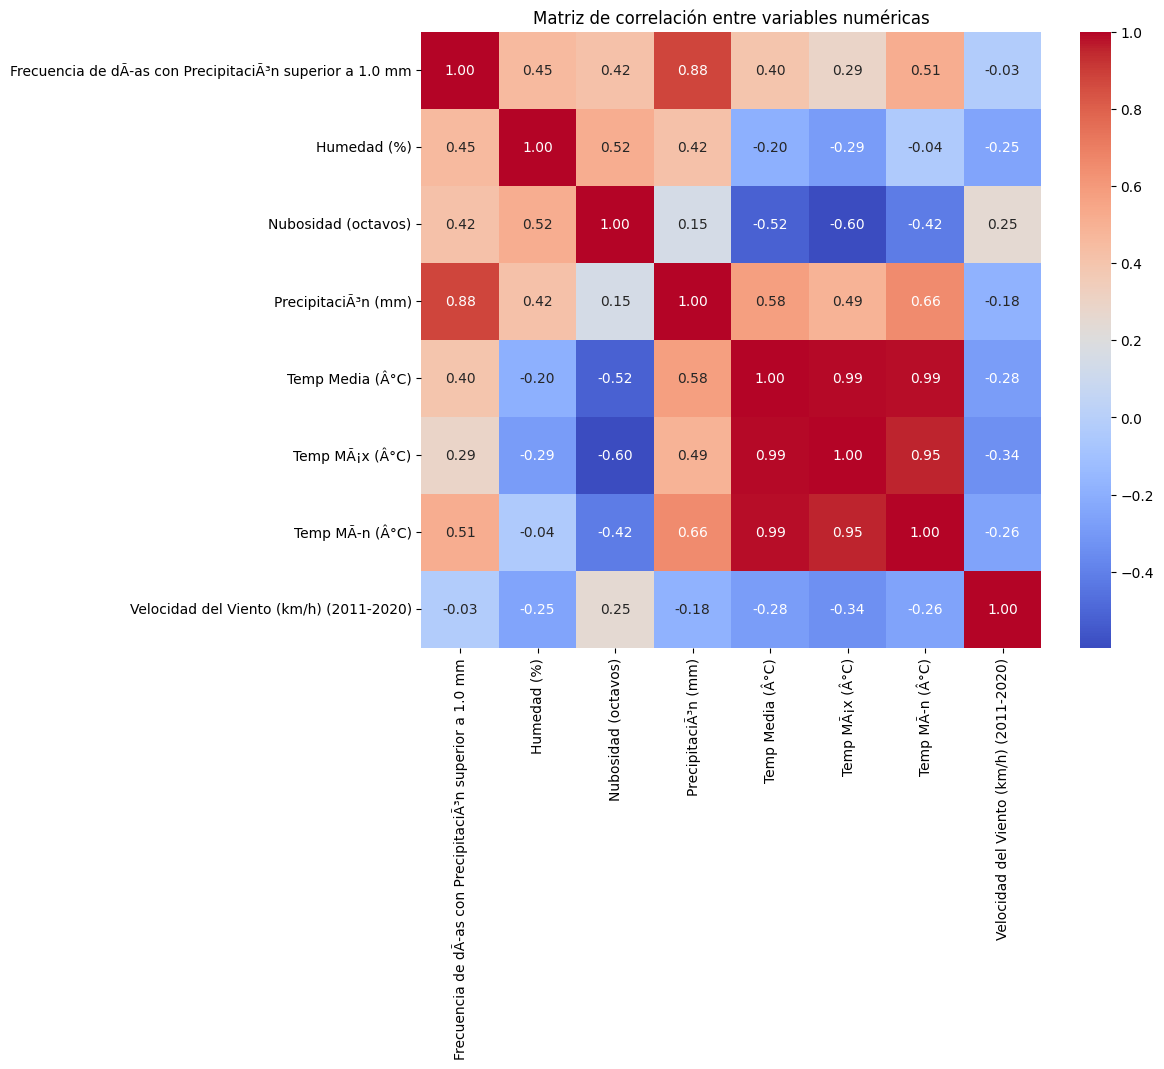

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[variables_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

PROBANDO DE TRABAJAR DIRECTAMENTE EN GITHUB